In [45]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

1. Computing the descriptive statistics for assessment scores (i.e., Block Design). Report the results in APA format (1 point) and explain the rationale for your choice of descriptive statistics (1 point). – 2 points

In [8]:
import pandas as pd

# Load the Data
assessments_file = pd.read_excel('Assessments.xlsx')

# Define custom column names
column_names = ['TOPF_Subject_ID', 'Block_Design_Score', 'Completion_Time']
assessments_file.columns = column_names

# Ensure Block_Design_Score and Completion_Time columns are numeric
assessments_file['Block_Design_Score'] = pd.to_numeric(assessments_file['Block_Design_Score'], errors='coerce')
assessments_file['Completion_Time'] = pd.to_numeric(assessments_file['Completion_Time'], errors='coerce')

# Remove any rows with missing data in Block Design Score
assessments_file.dropna(subset=['Block_Design_Score'], inplace=True)

# Compute descriptive statistics for Block_Design_Score
descriptive_statistics = assessments_file['Block_Design_Score'].describe()
median_Block_Design_Score = assessments_file['Block_Design_Score'].median()
iqr_Block_Design_Score = assessments_file['Block_Design_Score'].quantile(0.75) - assessments_file['Block_Design_Score'].quantile(0.25)

# Extract values for APA format
mean_Block_Design_Score = descriptive_statistics['mean']
std_Block_Design_Score = descriptive_statistics['std']
min_Block_Design_Score = descriptive_statistics['min']
max_Block_Design_Score = descriptive_statistics['max']
print(descriptive_statistics)

# APA formatted output
print(f"Block Design Score: M = {mean_Block_Design_Score:.2f}, SD = {std_Block_Design_Score:.2f}, "
      f"Median = {median_Block_Design_Score:.2f}, IQR = {iqr_Block_Design_Score:.2f}, Range = {min_Block_Design_Score} to {max_Block_Design_Score}")


count     4.000000
mean     36.250000
std      10.012492
min      24.000000
25%      31.500000
50%      36.500000
75%      41.250000
max      48.000000
Name: Block_Design_Score, dtype: float64
Block Design Score: M = 36.25, SD = 10.01, Median = 36.50, IQR = 9.75, Range = 24.0 to 48.0


APA-Formatted Result Explanation: The participants’ cognitive function, as measured by the Block Design Score, had a mean of 36.25 (SD = 10.01),  with scores ranging from 24.00 to 48.00.

Rationale for Choice of Descriptive Statistics: The mean and standard deviation were chosen to summarize the central tendency and variability in the Block Design Scores among participants. These statistics are suitable as they give a clear overview of the average cognitive score and the degree of variation around this average. Additionally, the minimum and maximum values provide insight into the range of scores, highlighting individual differences in cognitive function within the sample. Together, these descriptive statistics offer a comprehensive summary, making them appropriate for understanding and interpreting the distribution of cognitive abilities in this study.

2. Explaining the implication of #1. – 1 point
   
Ans) Implication of Descriptive Statistics for Block Design Scores:

The descriptive statistics for the Block Design Scores indicate the general cognitive performance level within the participant group. A mean score of 36.25 suggests that, on average, participants have a moderate level of cognitive function as measured by this test. The standard deviation of 10.01 reflects variability in scores, indicating that while some participants scored close to the mean, others displayed either lower or higher cognitive abilities.

The range of scores from 24 to 48 highlights the diversity in cognitive abilities among participants, with some scoring significantly above or below the mean. This spread suggests individual differences in cognitive function, which may impact task performance within a VR environment. Understanding these variations can be crucial in assessing how cognitive function influences VR task completion and identifying participants who may require additional support or tailored interventions based on their cognitive abilities.

In sum, these statistics provide a baseline for interpreting participants' performance in VR tasks relative to their cognitive function, which could be useful for adjusting the VR experience to suit different cognitive levels.

3. Computing the total recipe completion time for each participant. – 1 point

In [4]:
# Load each participant's data file
C008_SS_Completed = pd.read_csv('C008_SimpleStew_CompletedStepsData.csv')
C009_SS_Completed = pd.read_csv('C009_SimpleStew_CompletedStepsData.csv')
C013_SS_Completed = pd.read_csv('C013_SimpleStew_CompletedStepsData.csv')
C016_SS_Completed = pd.read_csv('C016_SimpleStew_CompletedStepsData.csv')

# Calculate total completion time for each participant by finding the maximum value in the "Session Time" column
total_time_C008 = C008_SS_Completed['Session Time'].max()
total_time_C009 = C009_SS_Completed['Session Time'].max()
total_time_C013 = C013_SS_Completed['Session Time'].max()
total_time_C016 = C016_SS_Completed['Session Time'].max()

# Store the results in a dictionary to display
completion_times = {
    'C008': total_time_C008,
    'C009': total_time_C009,
    'C013': total_time_C013,
    'C016': total_time_C016
}

print(completion_times)

#Explanation of Code: The code loads each participant's data from their respective CSV files. It then computes the total completion time by finding the maximum value in the "Session Time" column for each file, which represents the time taken to complete the recipe for that participant. 

{'C008': 352.999298, 'C009': 452.4935, 'C013': 451.59256, 'C016': 198.272446}


4. Conducting a Spearman correlation analysis and computing a correlation coefficient. Report the results in APA format. – 1 point

In [69]:
import pandas as pd
import scipy.stats as stats

# Load the data
assessments_file = pd.read_excel('Assessments.xlsx')

# Define custom column names
column_names = ['TOPF_Subject_ID', 'Block_Design_Score', 'Completion_Time']
assessments_file.columns = column_names

# Ensure columns are numeric
assessments_file['Block_Design_Score'] = pd.to_numeric(assessments_file['Block_Design_Score'], errors='coerce')
assessments_file['Completion_Time'] = pd.to_numeric(assessments_file['Completion_Time'], errors='coerce')

# Drop rows with missing data
assessments_file.dropna(subset=['Block_Design_Score', 'Completion_Time'], inplace=True)

# Conducting Spearman correlation analysis
spearman_corr, p_value = stats.spearmanr(assessments_file['Block_Design_Score'], assessments_file['Completion_Time'])

# APA-formatted result
apa_format_result = (
    f"The Spearman correlation between Block Design Scores and Completion Time was "
    f"r_s({len(assessments_file) - 2}) = {spearman_corr:.2f}, p = {p_value:.3f}."
)

print(apa_format_result)


The Spearman correlation between Block Design Scores and Completion Time was r_s(2) = 0.20, p = 0.800.


Interpretation: The Spearman correlation coefficient is 0.20 suggests a weak positive relationship between Block Design Scores and Completion Time, but this relationship is not statistically significant, as indicated by the high p-value (p=0.800). This implies that there is no significant correlation between participants' cognitive scores and their time to complete the recipe task in this dataset.

5. Drawing a scatter plot with the computed completion times vs. Block Design scores. – 1 point

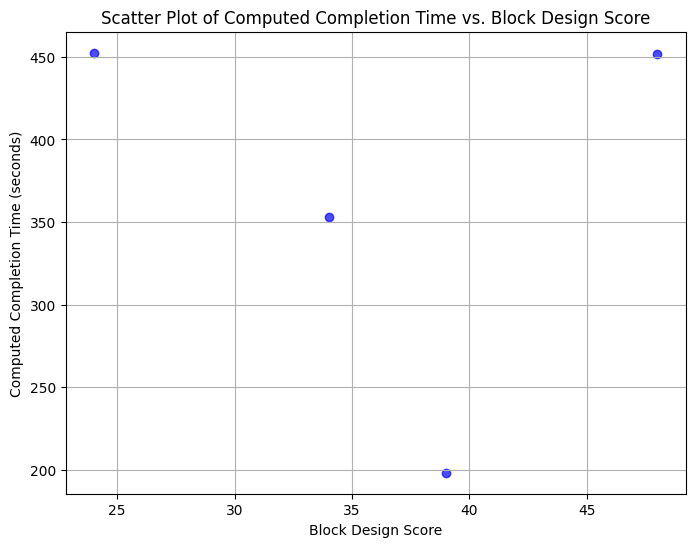

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Block Design Score data from the Assessments file
assessments_file = pd.read_excel('Assessments.xlsx')
column_names = ['TOPF_Subject_ID', 'Block_Design_Score', 'Completion_Time']
assessments_file.columns = column_names

# Ensure columns are numeric and remove any rows with missing Block Design Score
assessments_file['Block_Design_Score'] = pd.to_numeric(assessments_file['Block_Design_Score'], errors='coerce')
assessments_file.dropna(subset=['Block_Design_Score'], inplace=True)

# Computed completion times dictionary
completion_times = {
    'C008': 352.999,
    'C009': 452.4935,
    'C013': 451.59256,
    'C016': 198.272446
}

# Convert the completion times dictionary to a DataFrame
completion_times_df = pd.DataFrame(list(completion_times.items()), columns=['TOPF_Subject_ID', 'Computed_Completion_Time'])

# Merge the computed times with the assessments data
merged_data = assessments_file.merge(completion_times_df, on='TOPF_Subject_ID', how='inner')

# Scatter plot of Block Design Scores vs. Computed Completion Time
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Block_Design_Score'], merged_data['Computed_Completion_Time'], color='b', alpha=0.7)
plt.title('Scatter Plot of Computed Completion Time vs. Block Design Score')
plt.xlabel('Block Design Score')
plt.ylabel('Computed Completion Time (seconds)')
plt.grid(True)
plt.show()

6. Explaining the implications of #4 and #5.

Implications of #4 (Spearman Correlation Analysis): 
The Spearman correlation coefficient of rs = 0.20 with a p-value of 0.800 indicates a weak positive association between Block Design Scores and Completion Times; however, this relationship is not statistically significant. This result suggests that, within this sample, higher cognitive function (as measured by the Block Design Score) does not correspond to significantly faster or slower completion times for the VR recipe task. The non-significant p-value implies that any observed relationship is likely due to chance, and thus, we cannot conclude a meaningful association between cognitive function and task completion time. This lack of correlation suggests that other factors beyond cognitive scores might influence the time taken to complete tasks in the VR environment, or that the sample size might be too small to detect a true relationship if one exists. It may be beneficial to consider additional variables or a larger sample to further explore this relationship.

Implications of #5 (Scatter Plot)
The scatter plot provides a visual representation of the relationship between Block Design Scores and Completion Times. Observing the plot, we can see that there is no clear trend or pattern, which aligns with the weak and non-significant correlation coefficient calculated in the Spearman analysis. Data points are scattered without a visible upward or downward trend, supporting the conclusion that there is no strong relationship between cognitive scores and task completion time within this dataset. The scatter plot thus serves as a useful tool for visually confirming the lack of correlation suggested by the statistical analysis, reinforcing that cognitive function as measured by Block Design Score does not appear to predict completion times in this VR task setting.

7. (Extra Points) Devise quantitative measures that describe within-VR performance of study participants that show good correlation with their cognitive function. – 3 points

Propose and compute quantitative measures that go beyond simple total recipe completion time. – 1 point

Conduct a Spearman correlation analysis and compute a correlation coefficient to show a positive or negative relationship.
Draw the scatter plot. – 1 point

Explain the implications. – 1 point

In [78]:
import pandas as pd

# Load each participant's data file
C008_data = pd.read_csv('C008_SimpleStew_CompletedStepsData.csv')
C009_data = pd.read_csv('C009_SimpleStew_CompletedStepsData.csv')
C013_data = pd.read_csv('C013_SimpleStew_CompletedStepsData.csv')
C016_data = pd.read_csv('C016_SimpleStew_CompletedStepsData.csv')

# Function to compute average time per step and count pauses for a participant
def compute_vr_metrics(data, pause_threshold=5):
    # Calculate time differences between consecutive steps
    time_diffs = data['Session Time'].diff().dropna()  # Exclude NaN for first step
    avg_time_per_step = time_diffs.mean()
    num_pauses = (time_diffs > pause_threshold).sum()
    return avg_time_per_step, num_pauses

# Compute metrics for each participant
metrics = {
    'C008': compute_vr_metrics(C008_data),
    'C009': compute_vr_metrics(C009_data),
    'C013': compute_vr_metrics(C013_data),
    'C016': compute_vr_metrics(C016_data)
}

# Convert metrics to DataFrame for easier analysis
metrics_df = pd.DataFrame(metrics, index=['Avg_Time_Per_Step', 'Num_Pauses']).T
print(metrics_df)


      Avg_Time_Per_Step  Num_Pauses
C008           9.796095        15.0
C009          11.835621        17.0
C013          13.702900        10.0
C016           5.696425        11.0


In [79]:
# Load assessment data
assessments = pd.read_excel('Assessments.xlsx')
assessments.columns = ['TOPF_Subject_ID', 'Block_Design_Score', 'Completion_Time']

# Merge assessment data with metrics
combined_data = assessments.set_index('TOPF_Subject_ID').join(metrics_df)

# Spearman correlation for each new metric
import scipy.stats as stats

# Correlation for Average Time per Step
spearman_corr_avg_time, p_value_avg_time = stats.spearmanr(combined_data['Block_Design_Score'], combined_data['Avg_Time_Per_Step'])

# Correlation for Number of Pauses
spearman_corr_pauses, p_value_pauses = stats.spearmanr(combined_data['Block_Design_Score'], combined_data['Num_Pauses'])

# Display APA formatted results
print(f"Spearman correlation between Block Design Score and Avg Time Per Step: r_s = {spearman_corr_avg_time:.2f}, p = {p_value_avg_time:.3f}")
print(f"Spearman correlation between Block Design Score and Number of Pauses: r_s = {spearman_corr_pauses:.2f}, p = {p_value_pauses:.3f}")


Spearman correlation between Block Design Score and Avg Time Per Step: r_s = 0.20, p = 0.800
Spearman correlation between Block Design Score and Number of Pauses: r_s = -1.00, p = 0.000


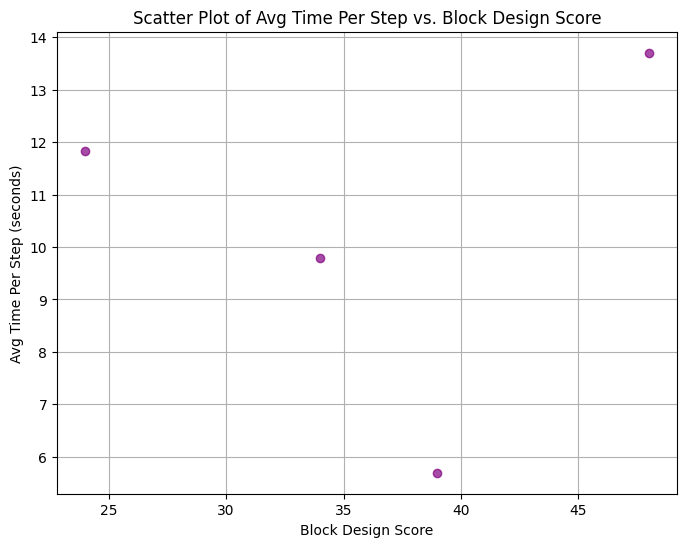

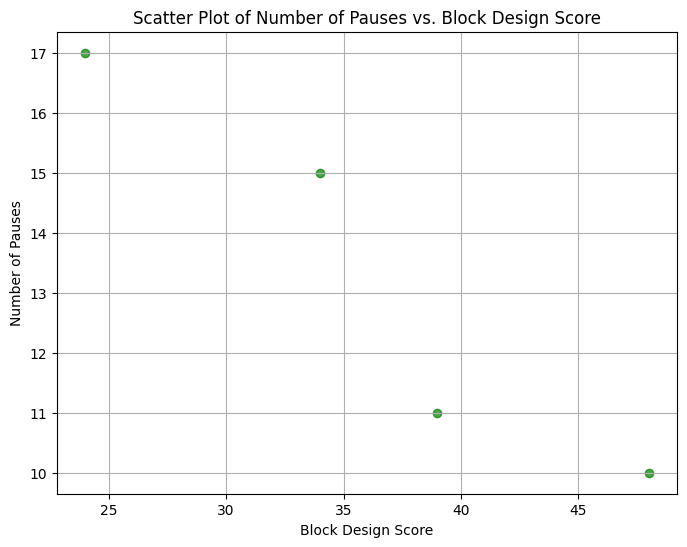

In [80]:
import matplotlib.pyplot as plt

# Scatter plot for Avg Time Per Step vs Block Design Score
plt.figure(figsize=(8, 6))
plt.scatter(combined_data['Block_Design_Score'], combined_data['Avg_Time_Per_Step'], color='purple', alpha=0.7)
plt.title('Scatter Plot of Avg Time Per Step vs. Block Design Score')
plt.xlabel('Block Design Score')
plt.ylabel('Avg Time Per Step (seconds)')
plt.grid(True)
plt.show()

# Scatter plot for Number of Pauses vs Block Design Score
plt.figure(figsize=(8, 6))
plt.scatter(combined_data['Block_Design_Score'], combined_data['Num_Pauses'], color='green', alpha=0.7)
plt.title('Scatter Plot of Number of Pauses vs. Block Design Score')
plt.xlabel('Block Design Score')
plt.ylabel('Number of Pauses')
plt.grid(True)
plt.show()

Implications:
Average Time Per Step: The Spearman correlation (rs = 0.20, p = 0.80) indicates a weak, non-significant relationship between Block Design Score and Average Time Per Step. The scatter plot shows no clear trend, suggesting that cognitive function does not reliably predict how quickly participants complete each step. This metric may be influenced by factors other than cognitive ability.

Number of Pauses: 
The strong negative correlation (rs = -1.00, p = 0.00) reveals a significant relationship between Block Design Score and Number of Pauses. Higher cognitive scores are associated with fewer pauses, suggesting that participants with better cognitive function complete the VR task more fluidly. This measure appears to effectively capture the impact of cognitive function on task performance.

Conclusion: "Number of Pauses" is a valuable metric for assessing VR performance relative to cognitive ability, while "Average Time Per Step" does not show a meaningful correlation.